<a href="https://colab.research.google.com/github/IImbryk/course_2023/blob/main/3_MSE/3_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –î–ó 2: –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è



___
# –¶–µ–ª—å

*~15 minutes*

–ú—ã –Ω–∞—á–∏–Ω–∞–µ–º —Å –ø—Ä–æ—Å—Ç–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∏—Å–ø–æ–ª—å–∑—É—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é –º–µ—Ç–æ–¥–æ–º –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤.
–í —ç—Ç–æ–º —É—Ä–æ–∫–µ –º—ã —É–∑–Ω–∞–µ–º, –∫–∞–∫ –ø–æ–¥–æ–≥–Ω–∞—Ç—å –ø—Ä–æ—Å—Ç—É—é –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –∫ –¥–∞–Ω–Ω—ã–º. –ê —Ç–∞–∫ –∂–µ:
- –ö–∞–∫ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É (MSE)
- –ö–∞–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –≤–ª–∏—è—é—Ç –Ω–∞ MSE
- –ö–∞–∫ –Ω–∞–π—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –∞–Ω–∞–∏—Ç–∏—á–µ—Å–∫–∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–º –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤.

---
# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# #@title –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Ä–∏—Å—É–Ω–∫–æ–≤
# import ipywidgets as widgets       # interactive display
# %config InlineBackend.figure_format = 'retina'
# plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [7]:
#@title –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç—Ä–∏—Å–æ–≤–∫–∏

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

---
# –†–∞–∑–¥–µ–ª 1: Mean Squared Error (MSE)

–°–æ–∑–¥–∞–¥–∏–º –ø—Ä–æ—Å—Ç–æ–π —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

–°–Ω–∞—á–∞–ª–∞ –º—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–∞—à—É–º–ª–µ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ $x$ –∏–∑ [0, 10) –≤–¥–æ–ª—å –ª–∏–Ω–∏–∏ $y = 1.2x$ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –Ω–∞—à–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –º—ã –±—É–¥–µ–º —Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å.

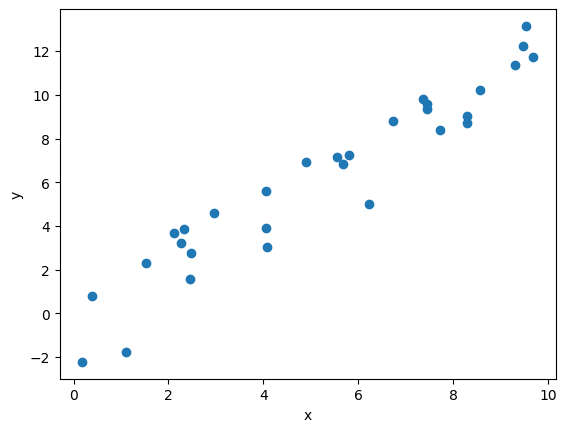

In [8]:
# @title

# @markdown –í—ã–ø–æ–ª–Ω–∏—Ç–µ —è—á–µ–∫—É –¥–ª—è –∑–∞–ø—É—Å–∫–∞ —Å–∏–º—É–ª—è—Ü–∏–∏

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ —É –Ω–∞—Å –µ—Å—Ç—å –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö, –º—ã –º–æ–∂–µ–º –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å. –ò—Å–ø–æ–ª—å–∑—É–µ–º MSE, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —É—Å–ø–µ—à–Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –Ω–∞–∫–ª–æ–Ω–∞ $\hat{\theta}$  –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö.

–ß–µ–º –º–µ–Ω—å—à–µ MSE, —Ç–µ–º –ª—É—á—à–µ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –¥–∞–Ω–Ω—ã–º.

## –ó–∞–¥–∞–Ω–∏–µ 1: –†–∞—Å—á–µ—Ç MSE

–í —ç—Ç–æ–º —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é MSE.

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, –±—É–¥–µ—Ç –∏–º–µ—Ç—å –≤–∏–¥:
\begin{equation}
\hat{y}_{i}= \theta x_{i}
\end{equation}
$\mathbf{x}$, $\mathbf{y}$ - –Ω–∞—à –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä –Ω–∞–∫–ª–æ–Ω–∞ $\hat{\theta}$ –ø–æ —Ñ–æ—Ä–º—É–ª–µ MSE:

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{equation}

–î–æ–ø–æ–ª–Ω–∏—Ç–µ –∫–æ–¥ –Ω–∏–∂–µ, —á—Ç–æ–±—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\hat\theta$ —Ñ—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–ª–∞ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É


In [9]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """

  # Compute the estimated y
  # y_hat =

  # # Compute mean squared error
  # mse =

  y_hat = theta_hat * x
  mse = np.mean((y - y_hat)**2)

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat = {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}")

theta_hat = 0.75, MSE = 9.08
theta_hat = 1.0, MSE = 3.01
theta_hat = 1.5, MSE = 4.52


–†–µ–∑—É–ª—å—Ç–∞—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å

theta_hat = 0.75, MSE = 9.08 \
theta_hat = 1.0, MSE = 3.01 \
theta_hat = 1.5, MSE = 4.52





–¢–æ –µ—Å—Ç—å –∏–∑ —Ç–µ–∫—É—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\hat{\theta} $ –ø—Ä–∏ –∑–Ω–∞—á–µ–Ω–∏–∏ $\hat{\theta} = 1.0$ –º—ã –ø–æ–ª—É—á–∏–º –ª—É—á—à–µ–µ –ø—Ä–∏–±–ª–µ–∂–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª—å—é –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö



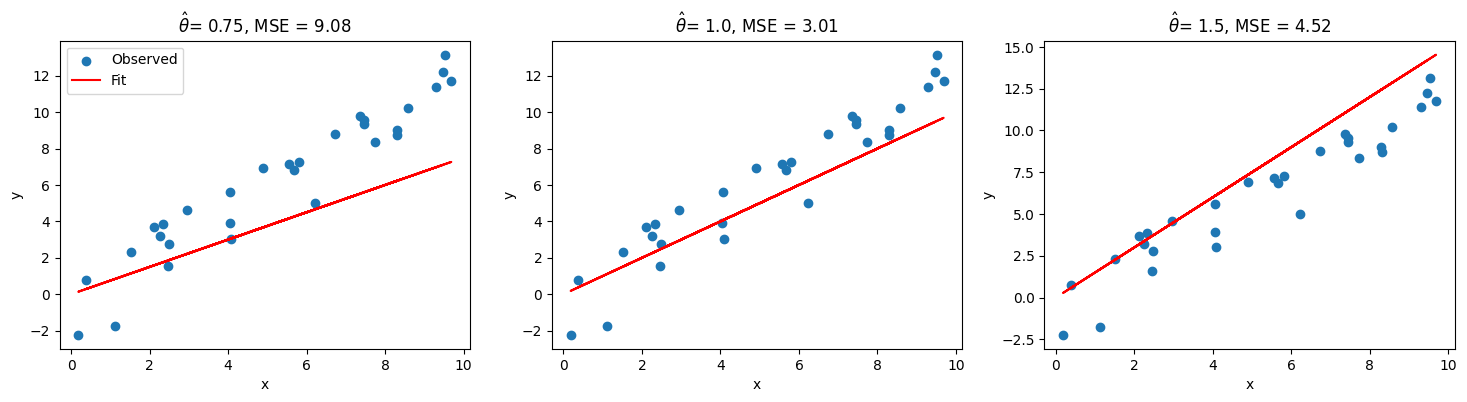

In [10]:
#@title

#@markdown –í—ã–ø–æ–ª–Ω–∏—Ç–µ –∫–æ–¥ –≤ —è—á–µ–π–∫–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

## –í–∏–¥–∂–µ—Ç

–ò—Å–ø–æ–ª—å–∑—É—è –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –≤–∏–¥–∂–µ—Ç, –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è $\theta$ –º–µ–Ω—è–µ—Ç—Å—è MSE.

–¢–∞–∫ –∂–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∞ –Ω–µ–≤—è–∑–∫–∞ (–∑–µ–ª–µ–Ω—ã–µ –ª–∏–Ω–∏–∏) - —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

–û—Ü–µ–Ω–∏—Ç–µ:
- –ö–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $\hat{\theta}$ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Å–∞–º–æ–π –Ω–∏–∑–∫–æ–π MSE?  
- –ö–∞–∫ –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ —ç—Ç–æ —Ö–æ—Ä–æ—à–∏–π —Å–ø–æ—Å–æ–± –æ—Ü–µ–Ω–∫–∏ $\theta$?


In [14]:
# #@title

# @widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
# def plot_data_estimate(theta_hat):
#   y_hat = theta_hat * x
#   plot_observed_vs_predicted(x, y, y_hat, theta_hat)
#   plt.show()

–ö–∞–∫ –≤–∏–¥–∏—Ç–µ, —ç—Ç–æ –Ω–µ —Å–∞–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π —Å–ø–æ—Å–æ–± –Ω–∞–π—Ç–∏ –Ω–∞–∏–ª—É—á—à—É—é –æ—Ü–µ–Ω–∫—É, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é –Ω–∞—à–∏–º –¥–∞–Ω–Ω—ã–º.

–ú—ã –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å —Ä–∞–∑—É–º–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤  $\hat{\theta}$ –∏ –≤—ã—á–∏—Å–ª–∏—Ç—å MSE –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —ç—Ç–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ.

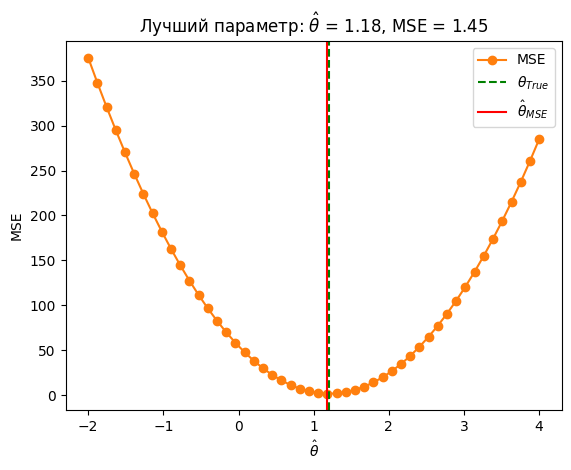

In [12]:
# @title

# @markdown –í—ã–ø–æ–ª–Ω–∏—Ç–µ –∫–æ–¥, —á—Ç–æ–±—ã –ø–µ—Ä–µ–±—Ä–∞—Ç—å theta_hats –∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–∞—Å—á–∏—Ç–∞—Ç—å MSE
# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"–õ—É—á—à–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–ª—É—á—à–µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤–∏–∏ –ø—Ä–∏ $\hat{\theta}=1.18$ —Ç–æ–≥–¥–∞ MSE = 1.45. –≠—Ç–æ –±–ª–∏–∑–∫–æ –∫ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ–º—É $\theta=1.2$


---
# –†–∞–∑–¥–µ–ª 2: –ú–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤

*~10 min*

–í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞–π—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä $\hat{\theta}$ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏:
- –ù–∞—Ö–æ–¥–∏–º –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ñ—É–Ω–∫—Ü–∏–∏ MSE
- –ü—Ä–∏—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–æ–∏–∑–æ–¥–Ω—É –∫ –Ω—É–ª—é.

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –±—É–¥–µ—Ç –ø–æ–ª—É—á–µ–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ
\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}

—Å–º. –≤—ã–≤–æ–¥ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–µ–∫—Ü–∏–∏

## –ó–∞–¥–∞–Ω–∏–µ 2: –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è

–í —ç—Ç–æ–º —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—Ö–æ–¥–∏—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $\hat{\theta}$, –∏—Å–ø–æ–ª—å—É—é –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –≤—ã—à–µ. –û–Ω –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–Ω–∏–º–∞—Ç—å –∞—Ä–≥—É–º–µ–Ω—Ç—ã $x$ –∏ $y$ –∏ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ ${\theta}$.

–ó–∞—Ç–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫, –∏—Å–ø–æ–ª—å–∑—É—è –Ω–∞–ø–∏—Å–∞–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è ${\theta}$ (—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ —É–∂–µ –≥–æ—Ç–æ–≤–∞)


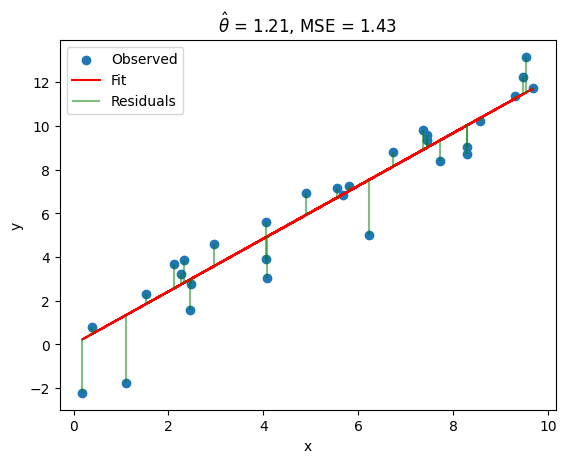

In [13]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (x @ y) / (x @ x)

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

*–ü—Ä–∏–º–µ—Ä –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞:*

<img alt='Solution hint' align='left' width=848.0 height=561.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png>



---
# –ò—Ç–æ–≥

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –º–µ—Ç–æ–¥–æ–º –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ ‚Äî —ç—Ç–æ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—É—é –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö.
- –ó–∞–¥–∞—á–∞: –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ $y_i$ –ø–æ –∑–∞–¥–∞–Ω–Ω–æ–º—É $x_i$
- –ú–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞: $\textrm{MSE}$
- –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏: –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è $\textrm{MSE}$ –ø—É—Ç–µ–º —Ä–µ—à–µ–Ω–∏—è —É—Ä–∞–≤–Ω–µ–Ω–∏—è
- –ö–ª—é—á–µ–≤–æ–π –º–æ–º–µ–Ω—Ç: –º—ã –ø–æ–¥–±–∏—Ä–∞–µ–º –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏, –æ–ø—Ä–µ–¥–µ–ª—è—è —Ü–µ–ª–µ–≤—É—é —Ñ—É–Ω–∫—Ü–∏—é –∏ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É—è –µ–µ.

–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ.

–í —ç—Ç–æ–º –ø—Ä–∏–º–µ—Ä–µ —É –Ω–∞—Å –ª–µ–≥–æ –±—ã–ª–æ –Ω–∞–π–¥–µ–Ω–æ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –Ω–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ –º–æ–¥–µ–ª–∏, –ø–æ—ç—Ç–æ–º—É —Ç–∞–∫ –≤–∞–∂–Ω–æ –∏–∑—É—á–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –º–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏. –°–∞–º—ã–π –±–∞–∑–æ–≤—ã–π - –º–µ—Ç–æ–¥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.

---
# –í—ã–≤–æ–¥ —Ñ–æ—Ä–º—É–ª—ã

–ü—Ä–∏—Ä–æ–≤–Ω—è–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é $\theta$ –∫ –Ω—É–ª—é,

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 &= 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) &= 0 \\
\theta\sum_{i=1}^N x_i^2 + \sum_{i=1}^N x_i y_i = 0
\end{align}

–í—ã—Ä–∞–∂–∞–µ–º $\theta$:

\begin{equation}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{equation}

–í—ã—Ä–∞–∂–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∑–∞–ø–∏—Å–∞–Ω–æ:

\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}


$\begin{pmatrix}
x_1 \\
x_2 \\
... \\
x_N
\end{pmatrix}^T* \begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_N
\end{pmatrix} = (x_1, x_2, ...., x_N) * \begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_N \end{pmatrix} = x_1y_1 + x_2y_2 + ... + x_Ny_N = \sum_{i=1}^N x_i y_i $




–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –¥–ª—è –ª—é–±–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —á–µ—Ä–µ–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ $Œ∏ = (X^T X)^{(-1)} X^T y$. –≠—Ç–æ —Ç–æ—á–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –Ω–æ –∏–º–µ–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –ø–æ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ–π —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∏ —á–∏—Å–ª–µ–Ω–Ω–æ–π —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –ø—Ä–∏ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è:
- –°–∏–Ω–≥—É–ª—è—Ä–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞: –ï—Å–ª–∏ $(X^T X)$ –Ω–µ –æ–±—Ä–∞—Ç–∏–º–∞ $(det = 0)$ - –∏–∑-–∑–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏, –±–æ–ª—å—à–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–º —á–µ–º –ø—Ä–∏–º–µ—Ä–æ–≤, –¥—É–±–ª–∏—Ä—É—é—â–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ–Ω—Å—Ç–∞–Ω—Å—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

- –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å: –ö–æ–≥–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã

- –í—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å: $O(n¬≥)$ –¥–ª—è –æ–±—Ä–∞—â–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã

- –ë–æ–ª—å—à–∏–µ –¥–∞–Ω–Ω—ã–µ: –ü—Ä–∏ –±–æ–ª—å—à–∏—Ö n –º–∞—Ç—Ä–∏—Ü–∞ $(X^T X)$ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–≥—Ä–æ–º–Ω–æ–π

üöÄ –ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫:
n > 10,000 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ‚Äî –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–¥–ª–µ–Ω–Ω—ã–º

- –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è (Ridge, Lasso) ‚Äî –Ω–µ—Ç –ø—Ä–æ—Å—Ç–æ–π –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–π —Ñ–æ—Ä–º—É–ª—ã

- –ù–µ–ª–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏ ‚Äî –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç

–†–µ—à–µ–Ω–∏—è –ø—Ä–æ–±–ª–µ–º—ã —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ—Å—Ç–∏:
- –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è: Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–æ–±–∞–≤–ª—è–µ—Ç ŒªI –∫ (X^T X)

- –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –£–¥–∞–ª–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

- SVD —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ: –ü—Å–µ–≤–¥–æ–æ–±—Ä–∞—Ç–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —á–µ—Ä–µ–∑ np.linalg.pinv()

- PCA: –ü–µ—Ä–µ—Ö–æ–¥ –∫ –≥–ª–∞–≤–Ω—ã–º –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º